Template matching

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from numba import jit

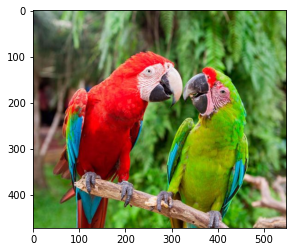

In [22]:
template = cv2.imread('/content/drive/MyDrive/Parrots tempalte 2.jpg')
image = cv2.imread('/content/drive/MyDrive/Parrots.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [2]:
def template_matching(template, image):
  height, width, channels = template.shape
  
  test_mass = image[0:height:,0:width:,::] - template[::,::,::]
  test_mass = np.square(test_mass,test_mass)
  min_sum = np.sum(test_mass)

  min_coord = (0,0)

  max_height = image.shape[0] - height
  max_width = image.shape[1] - width

  for i in range(0,max_height,2):
    for j in range(0,max_width,2):
      test_mass = image[i:height + i:,j:width + j:,::] - template[::,::,::]
      test_mass = np.square(test_mass,test_mass)
      sum = np.sum(test_mass)
      if sum < min_sum:
        min_sum = sum
        min_coord = (i,j)

  image_copy = np.copy(image)
  cv2.rectangle(image_copy,(min_coord[1],min_coord[0]),(min_coord[1]+width,min_coord[0]+height),(255,0,0),3)
  plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

tempalte_matching = jit(template_matching)

In [3]:
def ORB(original_img, query_img):
  query_img_bw = cv2.cvtColor(query_img, cv2.IMREAD_GRAYSCALE)
  original_img_bw = cv2.cvtColor(original_img, cv2.IMREAD_GRAYSCALE)
  orb = cv2.ORB_create()
  queryKP, queryDes = orb.detectAndCompute(query_img_bw,None)
  trainKP, trainDes = orb.detectAndCompute(original_img_bw,None)
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = matcher.match(queryDes,trainDes)
  matches = sorted(matches, key = lambda x:x.distance)
  print(type(matches[0]))
  final_img = cv2.drawMatches(query_img, queryKP, 
                            original_img, trainKP, matches[:25],None)
   
  final_img = cv2.resize(final_img, (1200,850))
  plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))


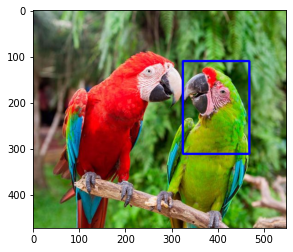

In [23]:
template_matching(template, image)

<class 'cv2.DMatch'>


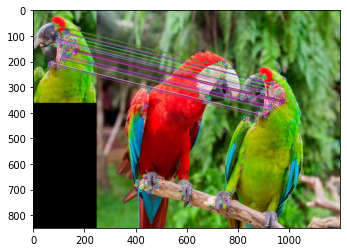

In [24]:
ORB(image, template)

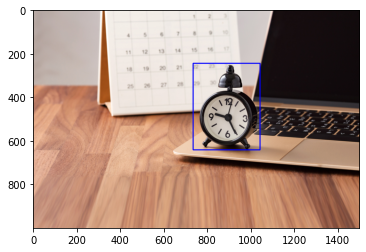

In [ ]:
template = cv2.imread('/content/drive/MyDrive/test2/temp1.jpeg')
image = cv2.imread('/content/drive/MyDrive/test2/original1.jpeg')
template_matching(template, image)

<class 'cv2.DMatch'>


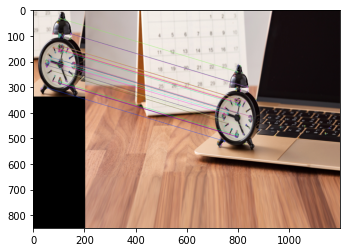

In [ ]:
ORB(image, template)

<class 'cv2.DMatch'>


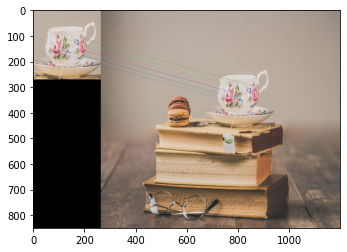

In [10]:
original_img = cv2.imread('/content/drive/MyDrive/test2/original2.jpg')
query_img = cv2.imread('/content/drive/MyDrive/test2/temp2.jpg')
ORB(original_img,query_img)

In [4]:
template = cv2.imread('/content/drive/MyDrive/test2/original4.jpg')
image = cv2.imread('/content/drive/MyDrive/test2/temp4.1.jpg')

<class 'cv2.DMatch'>


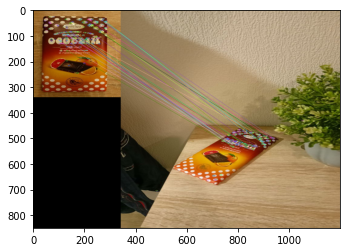

In [5]:
ORB(image, template)

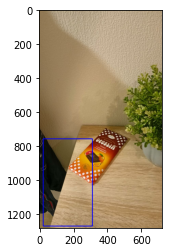

In [6]:
template_matching(template,image)

<class 'cv2.DMatch'>


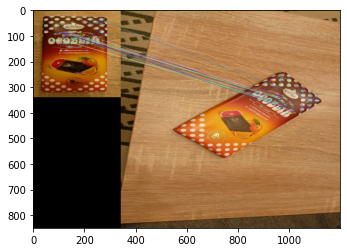

In [7]:
image = cv2.imread('/content/drive/MyDrive/test2/temp4.2.jpg')
ORB(image, template)

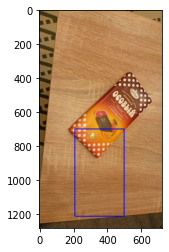

In [8]:
template_matching(template,image)

<class 'cv2.DMatch'>


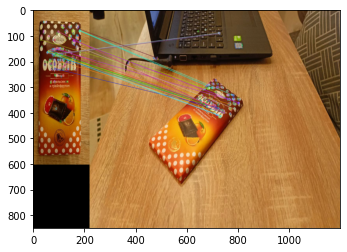

In [9]:
image = cv2.imread('/content/drive/MyDrive/test2/temp4.3.jpg')
ORB(image, template)

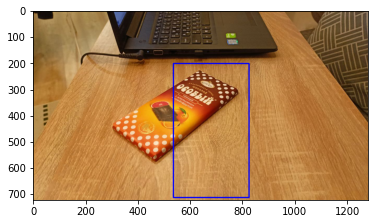

In [10]:
template_matching(template,image)

<class 'cv2.DMatch'>


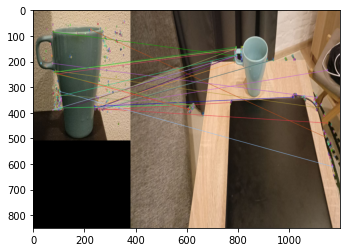

In [13]:
image = cv2.imread('/content/drive/MyDrive/test2/temp3.1.jpg')
template = cv2.imread('/content/drive/MyDrive/test2/original3.jpg')
ORB(image,template)

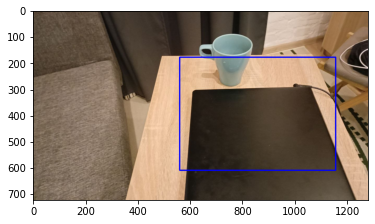

In [14]:
template_matching(template,image)

<class 'cv2.DMatch'>


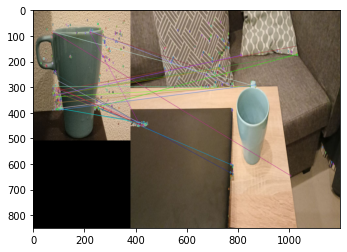

In [18]:
image = cv2.imread('/content/drive/MyDrive/test2/temp3.2.jpg')
template = cv2.imread('/content/drive/MyDrive/test2/original3.jpg')
ORB(image,template)

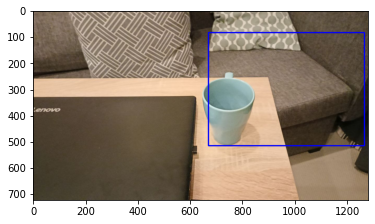

In [19]:
template_matching(template,image)